In [2]:
from functions import *
import pandas as pd
from time_stitches import *
import warnings
from step1_functions import *

warnings.filterwarnings('ignore')

In [61]:
"""subjects = [1,19, 23,7, 24, 26, 10, 13, 16, 17, 20, 27]
i = 0
for subject in (subjects):
    tweezers_rec = pd.read_csv(f'Data/Sync_data/S_{subject}_TW_reconstructed.csv')
    needle_holder_rec = pd.read_csv(f'Data/Sync_data/S_{subject}_NH_reconstructed.csv')

    start_t_task = full_segments_time[i]['1'][0]
    end_t_task = full_segments_time[i]['8'][1]

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    # Tracer les données pour 'bh'
    sns.lineplot(data=needle_holder_rec, x='Time (Seconds)', y='X.1', ax=ax1)
    sns.lineplot(data=needle_holder_rec, x='Time (Seconds)', y='Y.1', ax=ax1)
    sns.lineplot(data=needle_holder_rec, x='Time (Seconds)', y='Z.1', ax=ax1)
    #ax1.axhline(y=(needle_holder_rec['X.1'].max()-needle_holder_rec['X.1'].median())/2, color='black', linestyle='--')
    #ax1.axhline(y=np.percentile(needle_holder_rec['X.1'],80), color='green', linestyle='--')
    #ax1.axvline(x=163, color='green', linestyle='--')

    ax1.axhline(y=needle_holder_rec['X.1'].median(), color='grey', linestyle='--')
    ax1.set_title(f'Coordinate according to time (Subject {subject}, Needle holder)')
    ax1.set_ylabel('Coordinate')
    ax1.axvline(x=start_t_task, color='black', linestyle='--')
    ax1.axvline(x=end_t_task, color='black', linestyle='--')
    ax1.set_xlim(start_t_task-60,start_t_task+60)
    #ax1.legend(['x', 'y', 'z'])


    # Tracer les données pour 'tw'
    sns.lineplot(data=tweezers_rec, x='Time (Seconds)', y='X.1', ax=ax2)
    sns.lineplot(data=tweezers_rec, x='Time (Seconds)', y='Y.1', ax=ax2)
    sns.lineplot(data=tweezers_rec, x='Time (Seconds)', y='Z.1', ax=ax2)
    ax2.set_title(f'Coordinate according to time (Subject {subject}, Tweezers)')
    #ax2.axhline(y=(tweezers_rec['X.1'].min() - tweezers_rec['X.1'].median())/2, color='black', linestyle='--')
    #ax2.axhline(y=np.percentile(tweezers_rec['X.1'],20), color='green', linestyle='--')
    #ax2.axhline(y=tweezers_rec['X.1'].median(), color='grey', linestyle='--')
    #ax2.axvline(x=300, color='green', linestyle='--')
    ax2.axvline(x=start_t_task, color='black', linestyle='--')
    ax2.axvline(x=end_t_task, color='black', linestyle='--')
    ax2.set_xlabel('Time')

    ax2.set_ylabel('Coordinate')
    #ax2.legend(['x', 'y', 'z'])
    i =i+1
    """


"subjects = [1,19, 23,7, 24, 26, 10, 13, 16, 17, 20, 27]\ni = 0\nfor subject in (subjects):\n    tweezers_rec = pd.read_csv(f'Data/Sync_data/S_{subject}_TW_reconstructed.csv')\n    needle_holder_rec = pd.read_csv(f'Data/Sync_data/S_{subject}_NH_reconstructed.csv')\n\n    start_t_task = full_segments_time[i]['1'][0]\n    end_t_task = full_segments_time[i]['8'][1]\n\n    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)\n\n    # Tracer les données pour 'bh'\n    sns.lineplot(data=needle_holder_rec, x='Time (Seconds)', y='X.1', ax=ax1)\n    sns.lineplot(data=needle_holder_rec, x='Time (Seconds)', y='Y.1', ax=ax1)\n    sns.lineplot(data=needle_holder_rec, x='Time (Seconds)', y='Z.1', ax=ax1)\n    #ax1.axhline(y=(needle_holder_rec['X.1'].max()-needle_holder_rec['X.1'].median())/2, color='black', linestyle='--')\n    #ax1.axhline(y=np.percentile(needle_holder_rec['X.1'],80), color='green', linestyle='--')\n    #ax1.axvline(x=163, color='green', linestyle='--')\n\n    ax1.axh

In [2]:
subjects = [1,19, 23,7, 24, 26, 10, 13, 16, 17, 20, 27]
i = 0
ref_pos_subject = []
for subject in (subjects):
    tweezers_rec = pd.read_csv(f'Data/Sync_data/S_{subject}_TW_reconstructed.csv')
    vx_tw, accx_tw = compute_v_acc(tweezers_rec)

    needle_holder_rec = pd.read_csv(f'Data/Sync_data/S_{subject}_NH_reconstructed.csv')
    vx_nh, accx_nh = compute_v_acc(needle_holder_rec)

    start_t_task = full_segments_time[i]['1'][0]

    tw_before_task = tweezers_rec[tweezers_rec['Time (Seconds)']<start_t_task]
    nh_before_task = needle_holder_rec[needle_holder_rec['Time (Seconds)']<start_t_task]

    cond_general = ((np.abs(tw_before_task['X.1'])<0.1) & (np.abs(nh_before_task['X.1'])<0.1) & (np.abs(tw_before_task['Y.1'])<0.1) & 
                    (np.abs(nh_before_task['Y.1'])<0.1) & (np.abs(tw_before_task['Z.1'])<0.2) & (np.abs(nh_before_task['Z.1'])<0.2))
    condition_x = (np.abs(tw_before_task['X.1'] - nh_before_task['X.1'])<0.01)
    condition_y = (np.abs(tw_before_task['Y.1'] - nh_before_task['Y.1'])<0.01) 
    condition_z = (np.abs(tw_before_task['Z.1'] - nh_before_task['Z.1'])<0.01)
    """not_moving_x = (np.abs(max(tw_before_task[condition_x]) - min(tw_before_task[condition_x]))<0.005)
    not_moving_y = (np.abs(max(condition_y) - min(condition_y))<0.005)
    not_moving_z = (np.abs(max(condition_z) - min(condition_z))<0.005)"""



    """ref_points = tw_before_task[condition_x & condition_y & condition_z & cond_general & not_moving_x &
                                not_moving_y & not_moving_z]"""
    ref_points = tw_before_task[condition_x & condition_y & condition_z & cond_general]
    ref_x = np.median(tw_before_task['X.1'])
    ref_y = np.median(tw_before_task['Y.1'])
    ref_z = np.median(tw_before_task['Z.1'])
    ref_pos_subject.append([ref_x, ref_y, ref_z])
    i = i+1

ref_pos_subject




ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

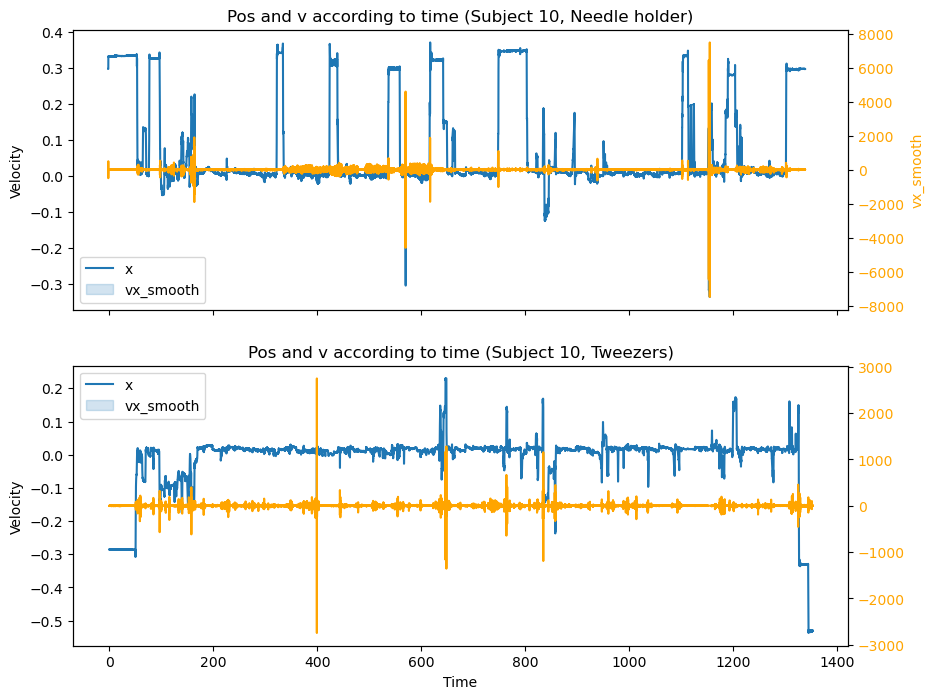

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Tracer les données pour 'bh'
sns.lineplot(x=needle_holder_rec['Time (Seconds)'], y=needle_holder_rec['X.1'], ax=ax1)
ax1_secondary_y = ax1.twinx()

#sns.lineplot(x=needle_holder_rec['Time (Seconds)'], y=smooth_vx_nh, ax=ax1_secondary_y, color = 'orange')
#sns.lineplot(x=needle_holder_rec['Time (Seconds)'], y=smooth_accx_nh, ax=ax1_secondary_y, color = 'orange')
ax1_secondary_y.set_ylabel('vx_smooth', color='orange')
#ax1_secondary_y.axhline(y=max(smooth_vx_nh)*0.4, color='green', linestyle='--')
#ax1_secondary_y.axhline(y=np.percentile(smooth_vx_nh, 99.9)*0.4, color='black', linestyle='--')
#ax1_secondary_y.set_ylim(-1000,1800)
ax1_secondary_y.tick_params(axis='y', labelcolor='orange') 

    
ax1.set_title(f'Pos and v according to time (Subject {subject}, Needle holder)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Velocity')
ax1.legend(['x', 'vx_smooth'])


# Tracer les données pour 'tw'
sns.lineplot(x=tweezers_rec['Time (Seconds)'], y=tweezers_rec['X.1'], ax=ax2)
ax2_secondary_y = ax2.twinx()

#sns.lineplot(x=tweezers_rec['Time (Seconds)'], y=smooth_vx_tw, ax=ax2_secondary_y, color = 'orange')
#sns.lineplot(x=tweezers_rec['Time (Seconds)'], y=smooth_accx_tw, ax=ax2_secondary_y, color = 'orange')
#ax2_secondary_y.set_ylabel('vx_smooth', color='orange')
#ax2_secondary_y.axhline(y=max(smooth_vx_tw)*0.4, color='green', linestyle='--')
#ax2_secondary_y.axhline(y=np.percentile(smooth_vx_tw, 99.9)*0.4, color='black', linestyle='--')
ax2_secondary_y.tick_params(axis='y', labelcolor='orange') 


ax2.set_title(f'Pos and v according to time (Subject {subject}, Tweezers)')
ax2.set_xlabel('Time')
ax2.set_ylabel('Velocity')
ax2.legend(['x', 'vx_smooth'])

### Rolling STD attempt

In [30]:
def compute_std_rolling(x, window_size):
    rolling_std = np.sqrt(np.convolve(x**2, np.ones(window_size)/window_size, mode='same') - np.convolve(x, np.ones(window_size)/window_size, mode='same')**2)
    return rolling_std

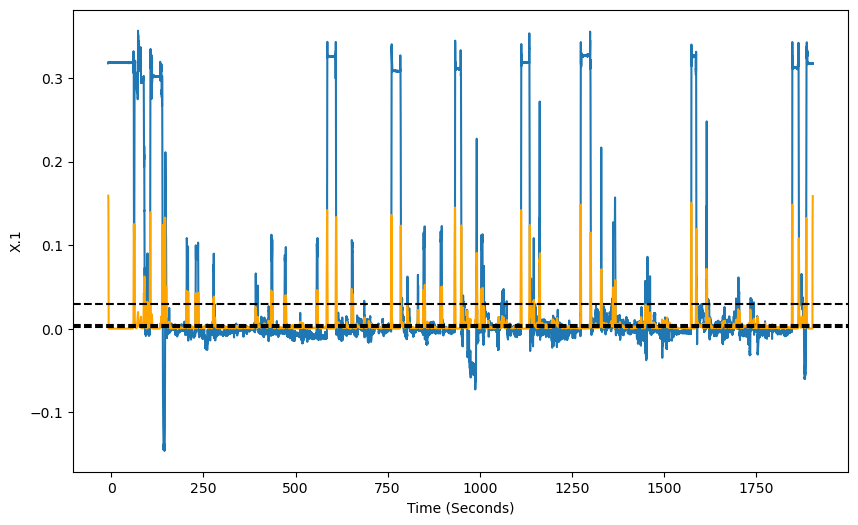

In [156]:
rolling_std_x_nh = compute_std_rolling(needle_holder_rec['X.1'], 240)
rolling_std_x_tw = compute_std_rolling(tweezers_rec['X.1'], 240)

plt.figure(figsize=(10, 6))
sns.lineplot(x=needle_holder_rec['Time (Seconds)'], y=needle_holder_rec['X.1'])
sns.lineplot(x=needle_holder_rec['Time (Seconds)'], y=rolling_std_x_nh ,color = 'orange')

plt.axhline(y=np.median(rolling_std_x_nh), color='black', linestyle='--')
plt.axhline(y=np.percentile(rolling_std_x_nh, 75), color='black', linestyle='--')
plt.axhline(y=np.percentile(rolling_std_x_nh, 95), color='black', linestyle='--')

plt.show()

----------------

# Attempt to exclude points not in the main task

In [46]:
subject = 19
nbr_smooth = 60
i =1

tweezers_rec = pd.read_csv(f'Data/Sync_data/S_{subject}_TW_reconstructed.csv')
vx_tw, accx_tw = compute_v_acc(tweezers_rec)
smooth_vx_tw, smooth_accx_tw = compute_v_acc(tweezers_rec, smooth_box=nbr_smooth, smooth_ = True)

needle_holder_rec = pd.read_csv(f'Data/Sync_data/S_{subject}_NH_reconstructed.csv')
vx_nh, accx_nh = compute_v_acc(needle_holder_rec)
smooth_vx_nh, smooth_accx_nh = compute_v_acc(needle_holder_rec, smooth_box=nbr_smooth, smooth_ = True)

In [47]:
nh_threshold_x = (needle_holder_rec['X.1'].max() - needle_holder_rec['X.1'].median())/2 #remove all points above it
tw_threshold_x = (tweezers_rec['X.1'].min() - tweezers_rec['X.1'].median())/2 #remove all points below it

nh_max_threshold_vx = max(smooth_vx_nh)*0.4 #initially /2
nh_min_threshold_vx = min(smooth_vx_nh)*0.4
mask_vx_max_nh = (smooth_vx_nh <nh_max_threshold_vx)
mask_vx_min_nh = (smooth_vx_nh >nh_min_threshold_vx)

tw_min_threshold_vx = min(smooth_vx_tw)*0.4
tw_max_threshold_vx = max(smooth_vx_tw)*0.4
mask_vx_min_tw = (smooth_vx_tw > tw_min_threshold_vx)
mask_vx_max_tw = (smooth_vx_tw < tw_max_threshold_vx)

In [48]:
selected_data_nh = needle_holder_rec
selected_data_tw = tweezers_rec

selected_data_nh['Selected'] = (selected_data_nh['X.1']<nh_threshold_x) #keep points below (considering only x position)
selected_data_tw['Selected'] = (selected_data_tw['X.1']>tw_threshold_x) #keep points above (considering only x position)

selected_data_nh['Selected_vx'] = mask_vx_max_nh
selected_data_tw['Selected_vx'] = mask_vx_min_tw


In [3]:
#function for x dicrimination
def remove_extreme_using_x_pos(nh_rec, tw_rec, prop_nh=0.5, prop_tw=0.5):
    """Create a mask keeping all points which are between two extreme values"""
    nh_threshold_x = (nh_rec['X.1'].max() - nh_rec['X.1'].median())*prop_nh #remove all points above it
    tw_threshold_x = (tw_rec['X.1'].min() - tw_rec['X.1'].median())*prop_tw #remove all points below it

    selected_nh = (nh_rec['X.1']<nh_threshold_x)
    selected_tw = (tw_rec['X.1']>tw_threshold_x)

    return selected_nh, selected_tw

In [4]:
def compute_mask_using_v(nh_rec, tw_rec, smooth_window=60, prop_nh=0.4, prop_tw=0.4):
    """Compute masks to discriminate periods when tools go to extreme positions ie when velocity reaches high/low values. 
        It gives for each tool a mask where velocity is more extreme than a threshold and another where it is lower than another threshold"""
    smooth_vx_nh, smooth_accx_nh = compute_v_acc(nh_rec, smooth_box=smooth_window, smooth_ = True)
    
    smooth_vx_tw, smooth_accx_tw = compute_v_acc(tw_rec, smooth_box=smooth_window, smooth_ = True)

    nh_max_threshold_vx = max(smooth_vx_nh)*prop_nh #initially /2
    nh_min_threshold_vx = min(smooth_vx_nh)*prop_nh
    mask_vx_max_nh = (smooth_vx_nh <nh_max_threshold_vx)
    mask_vx_min_nh = (smooth_vx_nh >nh_min_threshold_vx)

    tw_min_threshold_vx = min(smooth_vx_tw)*prop_tw
    tw_max_threshold_vx = max(smooth_vx_tw)*prop_tw
    mask_vx_min_tw = (smooth_vx_tw > tw_min_threshold_vx)
    mask_vx_max_tw = (smooth_vx_tw < tw_max_threshold_vx)

    return [mask_vx_min_nh, mask_vx_max_nh], [mask_vx_min_tw, mask_vx_max_tw]

In [5]:
def compute_event_time(segments_time_i, selected_data_nh, selected_data_tw, mask_vx_min_nh,  mask_vx_max_nh, mask_vx_min_tw, mask_vx_max_tw):
    start_t_task = segments_time_i['1'][0] #beginning of first stitch
    end_t_task = segments_time_i['8'][1] #end of last stitch

    """Needle Holder"""
    #give the position of last True before changing to False (juste before reaching v threshold to exclude points)
    start_pic_max_nh = list(np.where(np.diff(mask_vx_max_nh.astype(int)) == -1)[0])
    #want the position of the last false before a new True
    end_pic_min_nh = list(np.where(np.diff(mask_vx_min_nh.astype(int)) == 1)[0])

    time_start_pic_max_nh_ = list(selected_data_nh.iloc[start_pic_max_nh]['Time (Seconds)'])
    #remove picks who start before the beginning of the task or after the end of the task
    time_start_pic_max_nh = [x for x in time_start_pic_max_nh_ if ((x >= start_t_task) & (x <= end_t_task))]

    time_end_pic_min_nh_ = list(selected_data_nh.iloc[end_pic_min_nh]['Time (Seconds)'])
    #remove picks who start before the beginning of the task or after the end of the task
    time_end_pic_min_nh = [x for x in time_end_pic_min_nh_ if ((x >= start_t_task) & (x <= end_t_task))]

    """Tweezers"""
    #give the position of last True before changing to False (juste before reaching v threshold to exclude points)
    start_pic_max_tw = list(np.where(np.diff(mask_vx_min_tw.astype(int)) == -1)[0])
    #want the position of the last false before a new True
    end_pic_min_tw = list(np.where(np.diff(mask_vx_max_tw.astype(int)) == 1)[0])

    time_start_pic_max_tw_ = list(selected_data_tw.iloc[start_pic_max_tw]['Time (Seconds)'])
    #remove picks who start before the beginning of the task or after the end of the task
    time_start_pic_max_tw = [x for x in time_start_pic_max_tw_ if ((x >= start_t_task) & (x <= end_t_task))]

    time_end_pic_min_tw_ = list(selected_data_tw.iloc[end_pic_min_tw]['Time (Seconds)'])
    #remove picks who start before the beginning of the task or after the end of the task
    time_end_pic_min_tw = [x for x in time_end_pic_min_tw_ if ((x >= start_t_task) & (x <= end_t_task))]

    return [time_start_pic_max_nh, time_end_pic_min_nh], [time_start_pic_max_tw, time_end_pic_min_tw]

    

In [6]:
def compute_pairs_time(time_start_pic_max, time_end_pic_min, delta_t=30):
    pairs = []
    for start in time_start_pic_max:
        delta_t = 30 #delta t max allowed is 30 s
        pair = []
        for end in time_end_pic_min:
            if (((end-start)<(delta_t)) & ((end-start)>0)):
                delta_t = end-start
                pair = [start-0.5, end+0.5] #we allow to take values 0.5s before and after the event time
        if pair: pairs.append(pair)
    return pairs

In [7]:
#version 3
def compute_pairs_time3(time_start_pic_max, time_end_pic_min, delta_t=60):
    pairs = []
    for start in (time_start_pic_max):
        end_times = np.array(time_end_pic_min)
        later_than_start = end_times[end_times>start]
        if (len(later_than_start)!=0):
            closest_end_time = later_than_start[(later_than_start-start).argmin()]
            if ((closest_end_time-start)<delta_t): 
                pairs.append([start-0.5, closest_end_time+0.5])
    return pairs

In [8]:
def remove_extreme_using_v_time(selected_data, pairs_t):
    """Return a mask of values to keep ie values that are not in the interval where velocity reaches extreme values"""
    mask = np.ones(len(selected_data), dtype=bool) 
    for t_start, t_end in pairs_t:
        mask &= (selected_data['Time (Seconds)'] < (t_start)) | (selected_data['Time (Seconds)'] > (t_end ))
    return mask

In [9]:
def adjust_time_pair(data, pairs, median_x, time_allowed = 3):
    new_pairs = []
    for start, end in pairs:
        interval_min = start - time_allowed/2
        interval_max = end + time_allowed/2

        #initialise in case we don't have new start/end
        new_start = start 
        new_end = end

        data_before = data[(data['Time (Seconds)']>interval_min) & (data['Time (Seconds)']<start)].reset_index(drop=True)
        data_after = data[(data['Time (Seconds)']>end) & (data['Time (Seconds)']<interval_max)].reset_index(drop=True)

        condition_b = np.abs(data_before['X.1']-median_x)<0.005
        if (np.sum(condition_b)>0):
            # we want the last time where we were close to the ref line (ie median)
            new_start_index = (data_before[condition_b]['X.1']).argmax() 
            new_start = data_before.loc[int(new_start_index)]['Time (Seconds)']

        condition_a = np.abs(data_after['X.1']-median_x)<0.005
        if (np.sum(condition_a)>0):
            # we want the first time we are cross the ref line (ie median)
            new_end_index = (data_after[condition_a]['X.1']).argmin()
            new_end = data_after.loc[int(new_end_index)]['Time (Seconds)']

        new_pairs.append([new_start, new_end])
    return new_pairs


In [10]:
def compute_event_time_x_pos(segments_time_i, selected_data_nh, selected_data_tw, mask_x_nh, mask_x_tw):
    start_t_task = segments_time_i['1'][0] #beginning of first stitch
    end_t_task = segments_time_i['8'][1] #end of last stitch

    """Needle Holder"""
    #give the position of last True before changing to False (juste before reaching v threshold to exclude points)
    start_pic_max_nh = list(np.where(np.diff(mask_x_nh.astype(int)) == -1)[0])
    #want the position of the last false before a new True
    end_pic_min_nh = list(np.where(np.diff(mask_x_nh.astype(int)) == 1)[0])

    time_start_pic_max_nh_ = list(selected_data_nh.iloc[start_pic_max_nh]['Time (Seconds)'])
    #remove picks who start before the beginning of the task or after the end of the task
    time_start_pic_max_nh = [x for x in time_start_pic_max_nh_ if ((x >= start_t_task) & (x <= end_t_task))]

    time_end_pic_min_nh_ = list(selected_data_nh.iloc[end_pic_min_nh]['Time (Seconds)'])
    #remove picks who start before the beginning of the task or after the end of the task
    time_end_pic_min_nh = [x for x in time_end_pic_min_nh_ if ((x >= start_t_task) & (x <= end_t_task))]

    """Tweezers"""
    #give the position of last True before changing to False (juste before reaching v threshold to exclude points)
    start_pic_max_tw = list(np.where(np.diff(mask_x_tw.astype(int)) == -1)[0])
    #want the position of the last false before a new True
    end_pic_min_tw = list(np.where(np.diff(mask_x_tw.astype(int)) == 1)[0])

    time_start_pic_max_tw_ = list(selected_data_tw.iloc[start_pic_max_tw]['Time (Seconds)'])
    #remove picks who start before the beginning of the task or after the end of the task
    time_start_pic_max_tw = [x for x in time_start_pic_max_tw_ if ((x >= start_t_task) & (x <= end_t_task))]

    time_end_pic_min_tw_ = list(selected_data_tw.iloc[end_pic_min_tw]['Time (Seconds)'])
    #remove picks who start before the beginning of the task or after the end of the task
    time_end_pic_min_tw = [x for x in time_end_pic_min_tw_ if ((x >= start_t_task) & (x <= end_t_task))]

    return [time_start_pic_max_nh, time_end_pic_min_nh], [time_start_pic_max_tw, time_end_pic_min_tw]

    

In [11]:
subject = 7
i =3

needle_holder_rec = pd.read_csv(f'Data/Sync_data/S_{subject}_NH_reconstructed.csv')
tweezers_rec = pd.read_csv(f'Data/Sync_data/S_{subject}_TW_reconstructed.csv')

medians_nh = (needle_holder_rec[['X.1', 'Y.1', 'Z.1']]).median()
medians_tw = (tweezers_rec[['X.1', 'Y.1', 'Z.1']]).median()

"""Position"""
selected_xpos_nh, selected_xpos_tw = remove_extreme_using_x_pos(needle_holder_rec, tweezers_rec, prop_nh=0.5, prop_tw=0.5)
time_event_xpos_nh, time_event_xpos_tw = compute_event_time_x_pos(full_segments_time[i], needle_holder_rec, tweezers_rec, selected_xpos_nh,
                                                            selected_xpos_tw)

pairs_t_xpos_nh = compute_pairs_time3(time_event_xpos_nh[0], time_event_xpos_nh[1])
pairs_t_xpos_tw = compute_pairs_time3(time_event_xpos_tw[0], time_event_xpos_tw[1])

pairs_adjusted_t_xpos_nh = adjust_time_pair(needle_holder_rec, pairs_t_xpos_nh, medians_nh['X.1'], time_allowed = 6)
pairs_adjusted_t_xpos_tw = adjust_time_pair(tweezers_rec, pairs_t_xpos_tw, medians_tw['X.1'], time_allowed=6)

mask_extreme_xpos_event_removed_nh = remove_extreme_using_v_time(needle_holder_rec, pairs_adjusted_t_xpos_nh)
mask_extreme_xpos_event_removed_tw = remove_extreme_using_v_time(tweezers_rec, pairs_adjusted_t_xpos_tw)

"""Velocity"""
mask_min_max_nh, mask_min_max_tw = compute_mask_using_v(needle_holder_rec, tweezers_rec, smooth_window=60, prop_nh=0.4, prop_tw=0.4)
time_event_nh, time_event_tw = compute_event_time(full_segments_time[i], needle_holder_rec, tweezers_rec, mask_min_max_nh[0],  
                                                        mask_min_max_nh[1], mask_min_max_tw[0], mask_min_max_tw[1])
            
pairs_t_nh = compute_pairs_time3(time_event_nh[0], time_event_nh[1])
pairs_t_tw = compute_pairs_time3(time_event_tw[0], time_event_tw[1])

pairs_adjusted_t_nh = adjust_time_pair(needle_holder_rec, pairs_t_nh, medians_nh['X.1'], time_allowed = 6)
pairs_adjusted_t_tw = adjust_time_pair(tweezers_rec, pairs_t_tw, medians_tw['X.1'], time_allowed = 6)

mask_extreme_v_event_removed_nh = remove_extreme_using_v_time(needle_holder_rec, pairs_adjusted_t_nh)
mask_extreme_v_event_removed_tw = remove_extreme_using_v_time(tweezers_rec, pairs_adjusted_t_tw)

selected_points_nh = needle_holder_rec[mask_extreme_xpos_event_removed_nh & mask_extreme_v_event_removed_nh & selected_xpos_nh]
selected_points_tw = tweezers_rec[mask_extreme_xpos_event_removed_tw & mask_extreme_v_event_removed_tw & selected_xpos_tw]

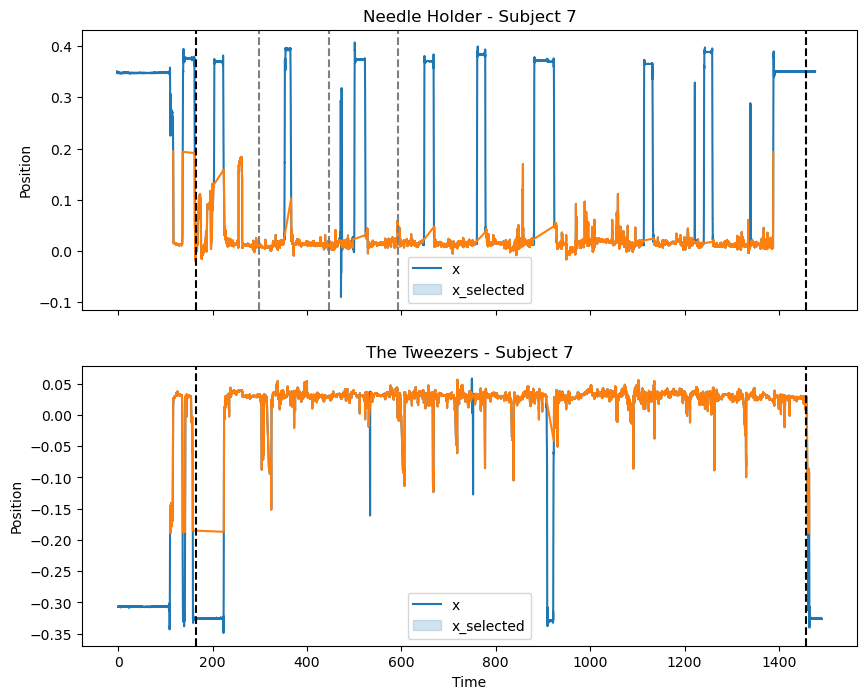

In [15]:
start_t_task = full_segments_time[i]['1'][0]
end_t_task = full_segments_time[i]['8'][1]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Tracer les données pour 'bh'
sns.lineplot(x=needle_holder_rec['Time (Seconds)'], y=needle_holder_rec['X.1'], ax=ax1)
sns.lineplot(x=selected_points_nh['Time (Seconds)'], y=selected_points_nh['X.1'], ax=ax1)
ax1.axvline(x=start_t_task, color='black', linestyle='--')
ax1.axvline(x=end_t_task, color='black', linestyle='--')
ax1.axvline(x=298, color='grey', linestyle='--')
ax1.axvline(x=446, color='grey', linestyle='--')
ax1.axvline(x=593, color='grey', linestyle='--')
#ax1.axhline(y=medians_nh['X.1'], color='black', linestyle='--')
#ax1.axhline(y=medians_nh['X.1']+0.005, color='black', linestyle='--')
            
#ax1.set_title(f'Pos and v according to time (Subject {subject}, Needle holder)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Position')
ax1.set_title(f'Needle Holder - Subject {subject}')
ax1.legend(['x', 'x_selected'])

# Tracer les données pour 'tw'
sns.lineplot(x=tweezers_rec['Time (Seconds)'], y=tweezers_rec['X.1'], ax=ax2)
sns.lineplot(x=selected_points_tw['Time (Seconds)'], y=selected_points_tw['X.1'], ax=ax2)
ax2.axvline(x=start_t_task, color='black', linestyle='--')
ax2.axvline(x=end_t_task, color='black', linestyle='--')

ax2.set_xlabel('Time')
ax2.set_ylabel('Position')
ax2.legend(['x', 'x_selected'])
ax2.set_title(f'The Tweezers - Subject {subject}')
plt.show()

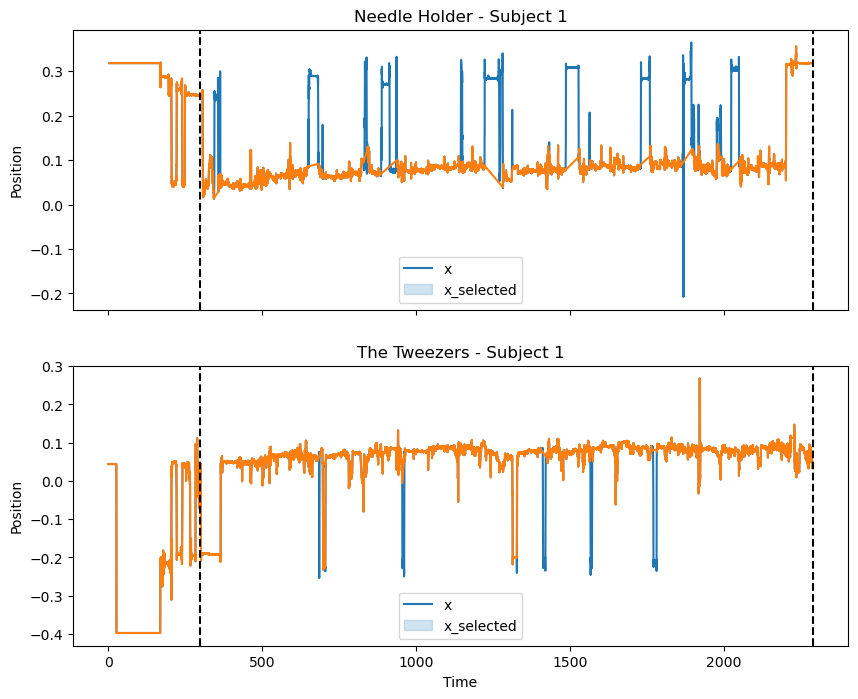

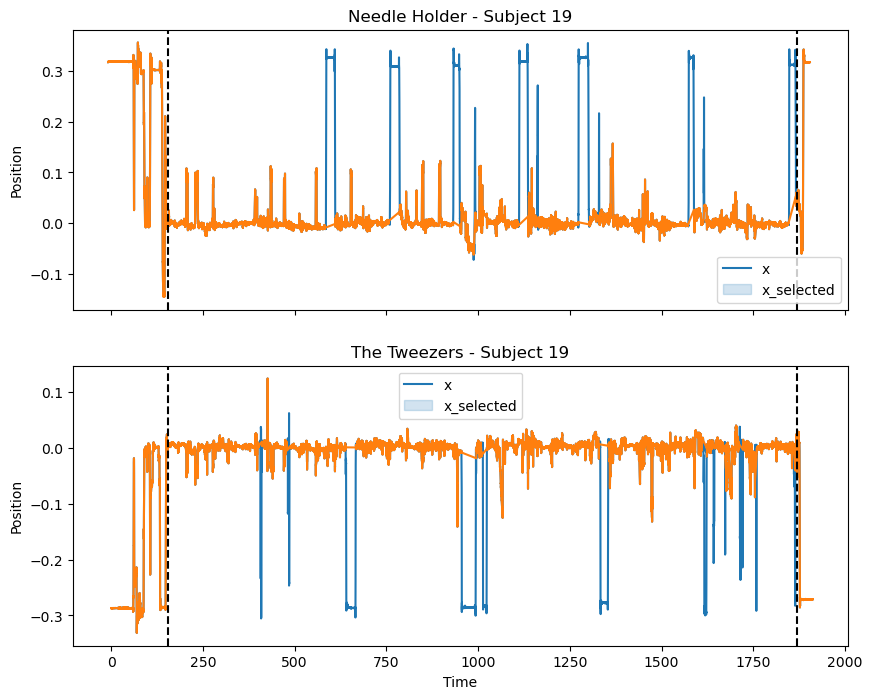

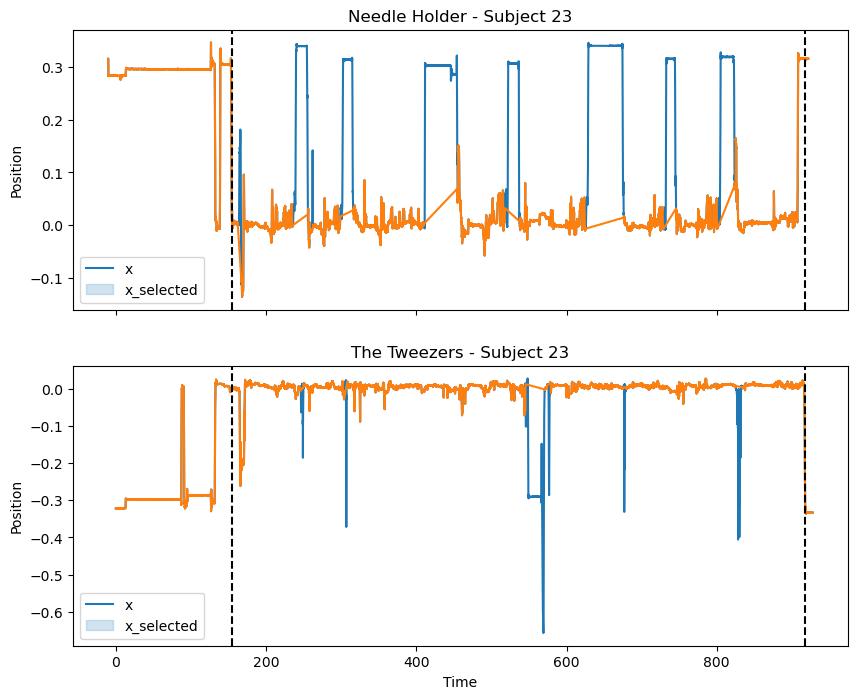

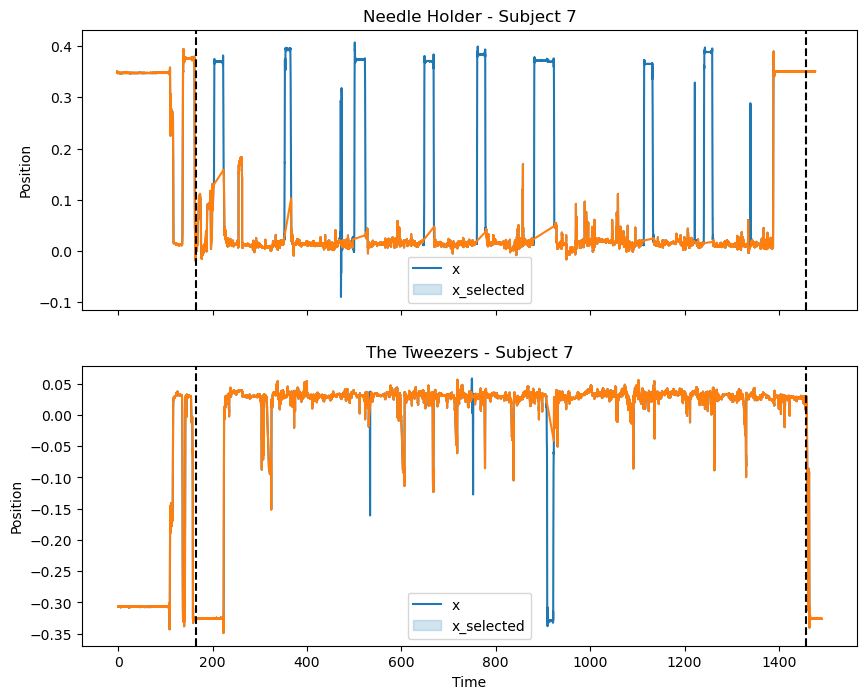

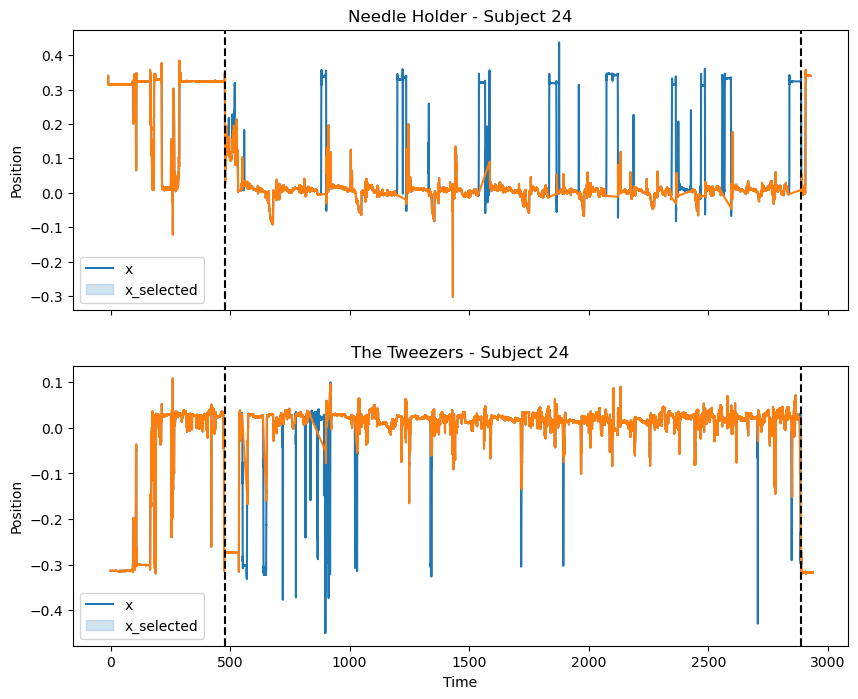

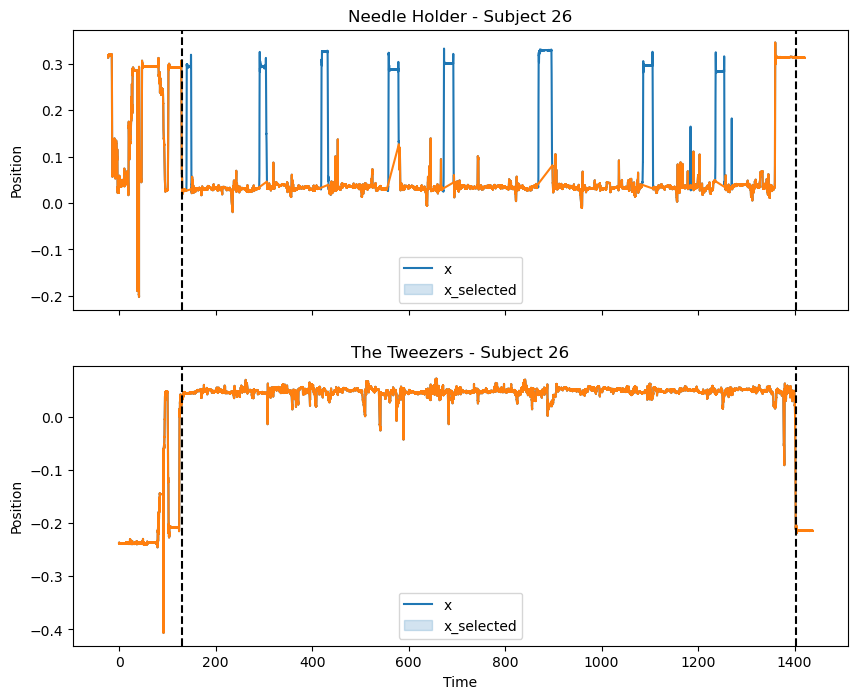

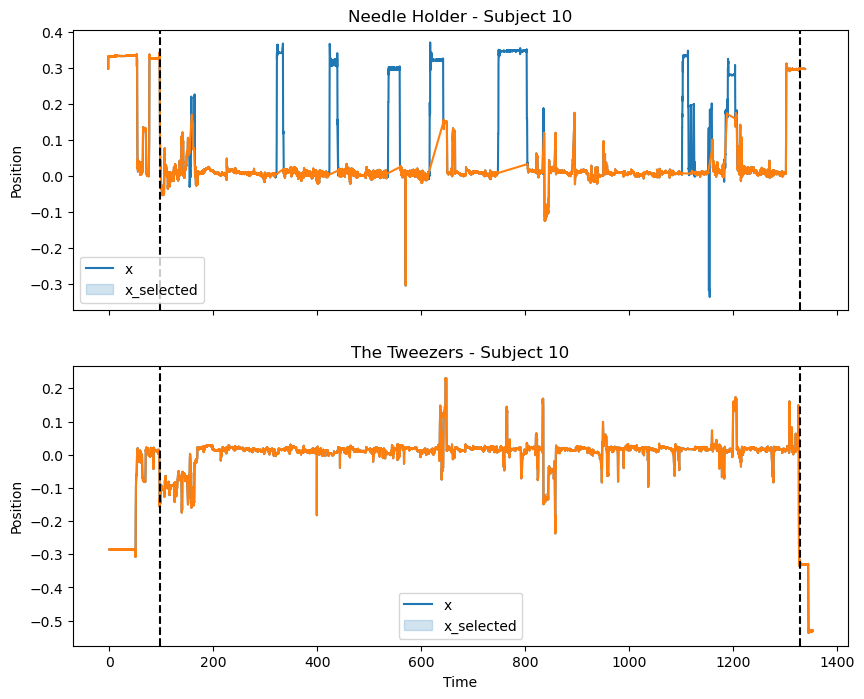

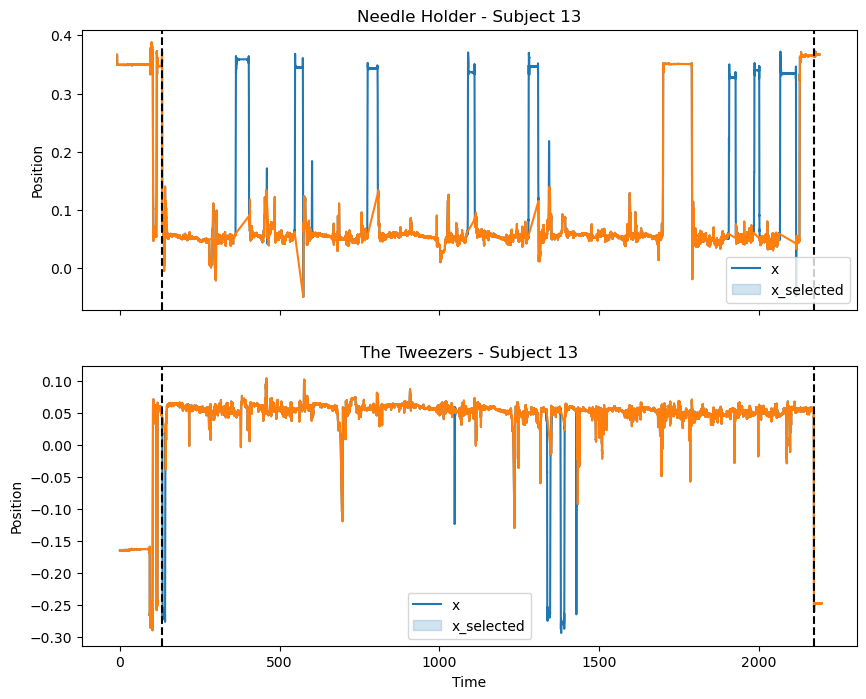

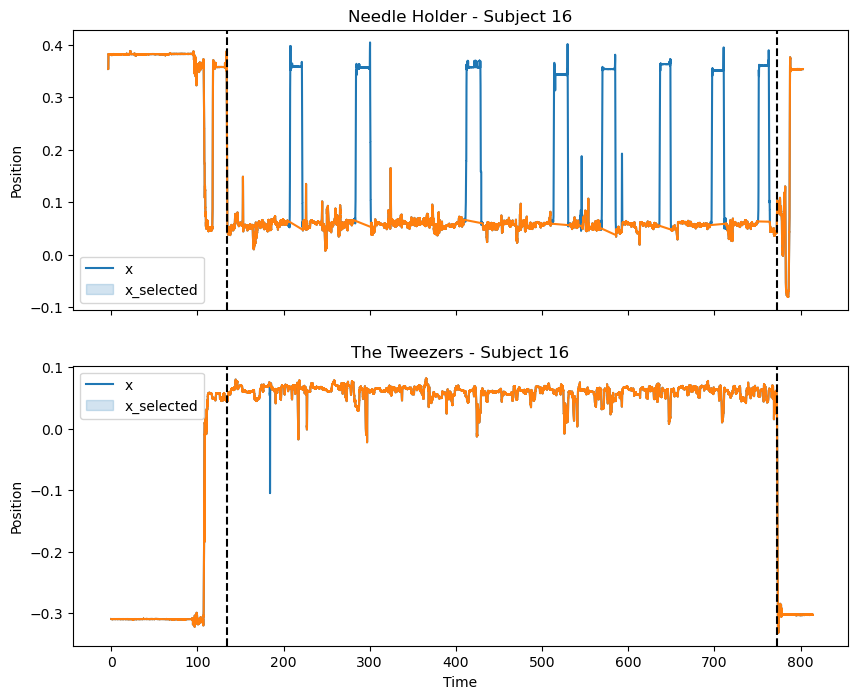

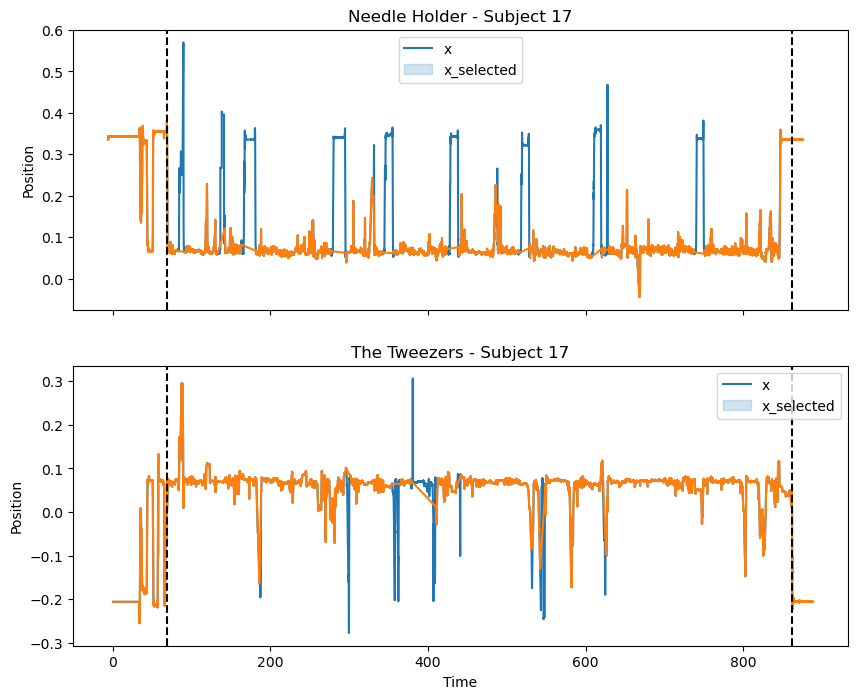

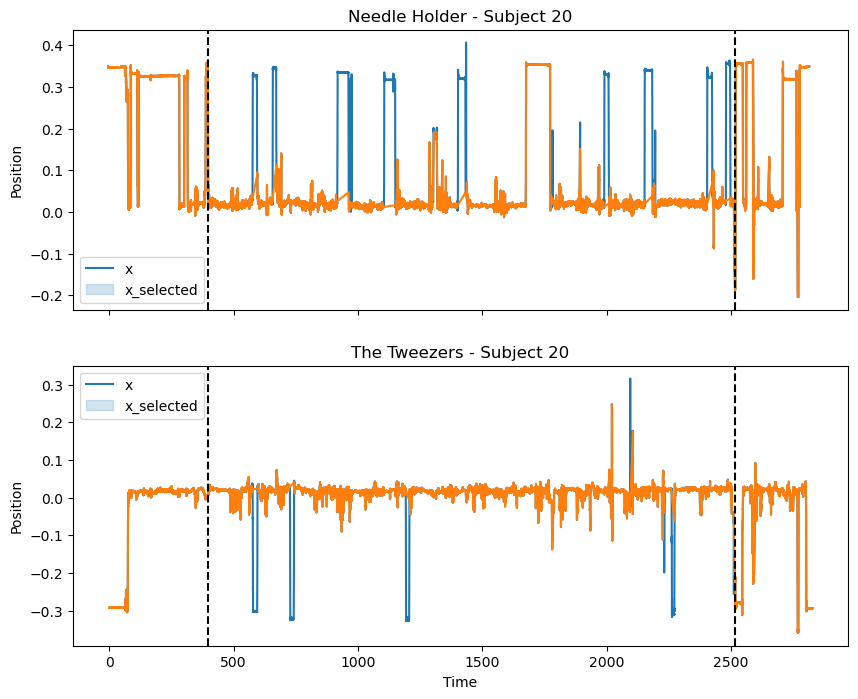

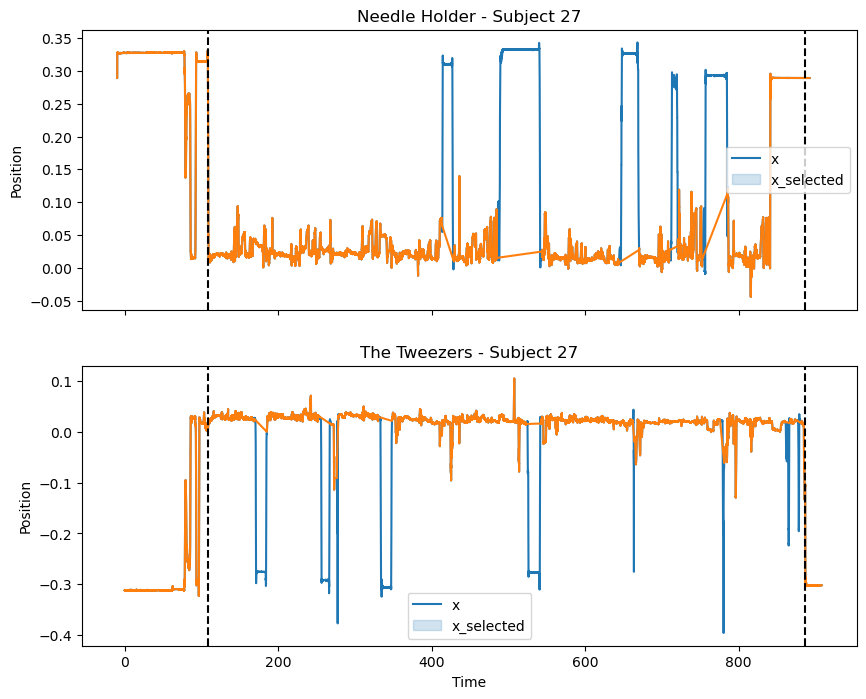

In [116]:
subjects = [1,19, 23,7, 24, 26, 10, 13, 16, 17, 20, 27]
i = 0
for subject in subjects:
    needle_holder_rec = pd.read_csv(f'Data/Sync_data/S_{subject}_NH_reconstructed.csv')
    tweezers_rec = pd.read_csv(f'Data/Sync_data/S_{subject}_TW_reconstructed.csv')

    medians_nh = (needle_holder_rec[['X.1', 'Y.1', 'Z.1']]).median()
    medians_tw = (tweezers_rec[['X.1', 'Y.1', 'Z.1']]).median()

    """Position"""
    selected_xpos_nh, selected_xpos_tw = remove_extreme_using_x_pos(needle_holder_rec, tweezers_rec, prop_nh=0.5, prop_tw=0.5)
    time_event_xpos_nh, time_event_xpos_tw = compute_event_time_x_pos(full_segments_time[i], needle_holder_rec, tweezers_rec, selected_xpos_nh,
                                                                selected_xpos_tw)

    pairs_t_xpos_nh = compute_pairs_time3(time_event_xpos_nh[0], time_event_xpos_nh[1])
    pairs_t_xpos_tw = compute_pairs_time3(time_event_xpos_tw[0], time_event_xpos_tw[1])

    pairs_adjusted_t_xpos_nh = adjust_time_pair(needle_holder_rec, pairs_t_xpos_nh, medians_nh['X.1'], time_allowed = 6)
    pairs_adjusted_t_xpos_tw = adjust_time_pair(tweezers_rec, pairs_t_xpos_tw, medians_tw['X.1'], time_allowed=6)

    mask_extreme_xpos_event_removed_nh = remove_extreme_using_v_time(needle_holder_rec, pairs_adjusted_t_xpos_nh)
    mask_extreme_xpos_event_removed_tw = remove_extreme_using_v_time(tweezers_rec, pairs_adjusted_t_xpos_tw)

    """Velocity"""
    mask_min_max_nh, mask_min_max_tw = compute_mask_using_v(needle_holder_rec, tweezers_rec, smooth_window=60, prop_nh=0.4, prop_tw=0.4)
    time_event_nh, time_event_tw = compute_event_time(full_segments_time[i], needle_holder_rec, tweezers_rec, mask_min_max_nh[0],  
                                                            mask_min_max_nh[1], mask_min_max_tw[0], mask_min_max_tw[1])

                
    pairs_t_nh = compute_pairs_time3(time_event_nh[0], time_event_nh[1])
    pairs_t_tw = compute_pairs_time3(time_event_tw[0], time_event_tw[1])

    pairs_adjusted_t_nh = adjust_time_pair(needle_holder_rec, pairs_t_nh, medians_nh['X.1'], time_allowed = 6)
    pairs_adjusted_t_tw = adjust_time_pair(tweezers_rec, pairs_t_tw, medians_tw['X.1'], time_allowed = 6)

    mask_extreme_v_event_removed_nh = remove_extreme_using_v_time(needle_holder_rec, pairs_adjusted_t_nh)
    mask_extreme_v_event_removed_tw = remove_extreme_using_v_time(tweezers_rec, pairs_adjusted_t_tw)

    #mask_extreme_v_event_removed_nh = remove_extreme_using_v_time(needle_holder_rec, pairs_t_nh)
    #mask_extreme_v_event_removed_tw = remove_extreme_using_v_time(tweezers_rec, pairs_t_tw)

    selected_points_nh = needle_holder_rec[mask_extreme_xpos_event_removed_nh & mask_extreme_v_event_removed_nh & selected_xpos_nh]
    selected_points_tw = tweezers_rec[mask_extreme_xpos_event_removed_tw & mask_extreme_v_event_removed_tw & selected_xpos_tw]
    
    start_t_task = full_segments_time[i]['1'][0]
    end_t_task = full_segments_time[i]['8'][1]

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    # Tracer les données pour 'bh'
    sns.lineplot(x=needle_holder_rec['Time (Seconds)'], y=needle_holder_rec['X.1'], ax=ax1)
    sns.lineplot(x=selected_points_nh['Time (Seconds)'], y=selected_points_nh['X.1'], ax=ax1)
    ax1.axvline(x=start_t_task, color='black', linestyle='--')
    ax1.axvline(x=end_t_task, color='black', linestyle='--')
                
    #ax1.set_title(f'Pos and v according to time (Subject {subject}, Needle holder)')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Position')
    ax1.set_title(f'Needle Holder - Subject {subject}')
    ax1.legend(['x', 'x_selected'])

    # Tracer les données pour 'tw'
    sns.lineplot(x=tweezers_rec['Time (Seconds)'], y=tweezers_rec['X.1'], ax=ax2)
    sns.lineplot(x=selected_points_tw['Time (Seconds)'], y=selected_points_tw['X.1'], ax=ax2)
    ax2.axvline(x=start_t_task, color='black', linestyle='--')
    ax2.axvline(x=end_t_task, color='black', linestyle='--')

    ax2.set_xlabel('Time')
    ax2.set_ylabel('Position')
    ax2.legend(['x', 'x_selected'])
    ax2.set_title(f'The Tweezers - Subject {subject}')
    #ax2.set_xlim(800, 840)
    plt.show()

    i = i+1

Plot result

In [99]:
#selected_vx_nh = selected_data_nh[(selected_data_nh['Selected_vx']) & ((selected_data_nh['Selected']))]
selected_vx_nh = selected_data_nh[(selected_data_nh['Interval_v_pics']) & ((selected_data_nh['Selected']))]
selected_vx_tw = selected_data_tw[(selected_data_tw['Interval_v_pics']) & (selected_data_tw['Selected'])]

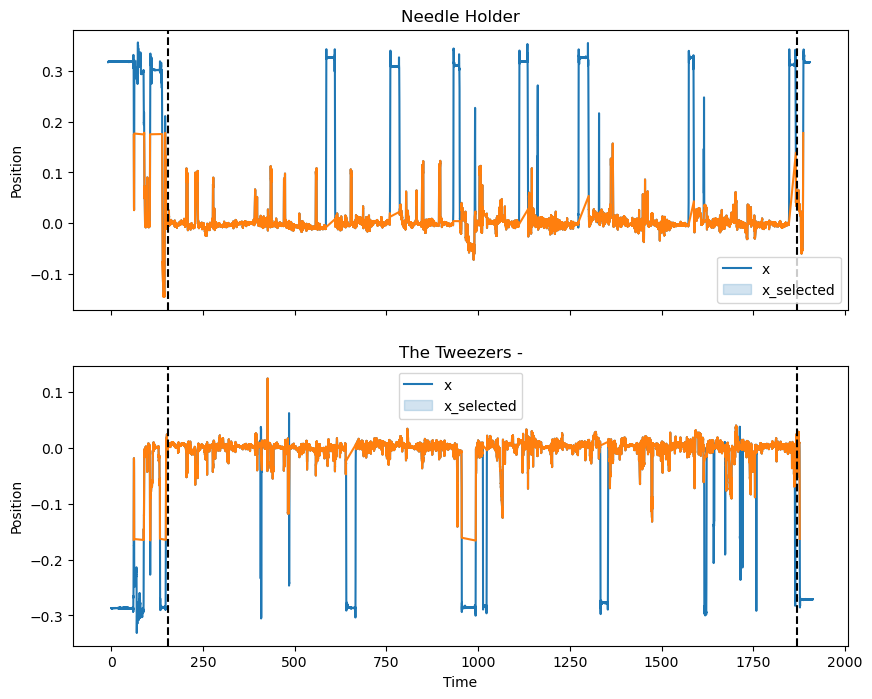

In [102]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Tracer les données pour 'bh'
sns.lineplot(x=needle_holder_rec['Time (Seconds)'], y=needle_holder_rec['X.1'], ax=ax1)
sns.lineplot(x=selected_vx_nh['Time (Seconds)'], y=selected_vx_nh['X.1'], ax=ax1)
ax1.axvline(x=start_t_task, color='black', linestyle='--')
ax1.axvline(x=end_t_task, color='black', linestyle='--')

"""ax1_secondary_y = ax1.twinx()

sns.lineplot(x=needle_holder_rec['Time (Seconds)'], y=smooth_vx_nh, ax=ax1_secondary_y, color = 'orange')
ax1_secondary_y.axhline(y=max(smooth_vx_nh)/2, color='black', linestyle='--')
ax1_secondary_y.set_ylabel('vx_smooth', color='orange')
ax1_secondary_y.tick_params(axis='y', labelcolor='orange') """

        
#ax1.set_title(f'Pos and v according to time (Subject {subject}, Needle holder)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Position')
ax1.set_title('Needle Holder')
ax1.legend(['x', 'x_selected'])


# Tracer les données pour 'tw'
sns.lineplot(x=tweezers_rec['Time (Seconds)'], y=tweezers_rec['X.1'], ax=ax2)
sns.lineplot(x=selected_vx_tw['Time (Seconds)'], y=selected_vx_tw['X.1'], ax=ax2)
ax2.axvline(x=start_t_task, color='black', linestyle='--')
ax2.axvline(x=end_t_task, color='black', linestyle='--')


ax2.set_xlabel('Time')
ax2.set_ylabel('Position')
ax2.legend(['x', 'x_selected'])
ax2.set_title(f'The Tweezers -')
plt.show()

### Attempt to exclude base on percentile on x

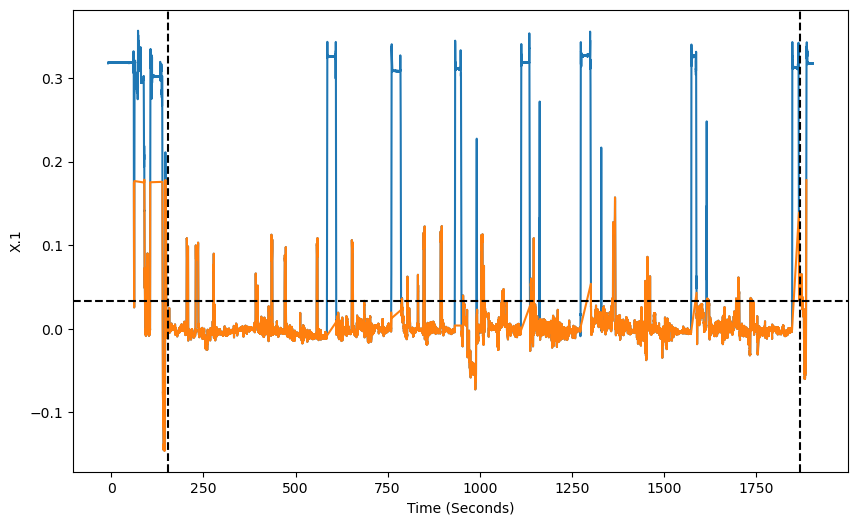

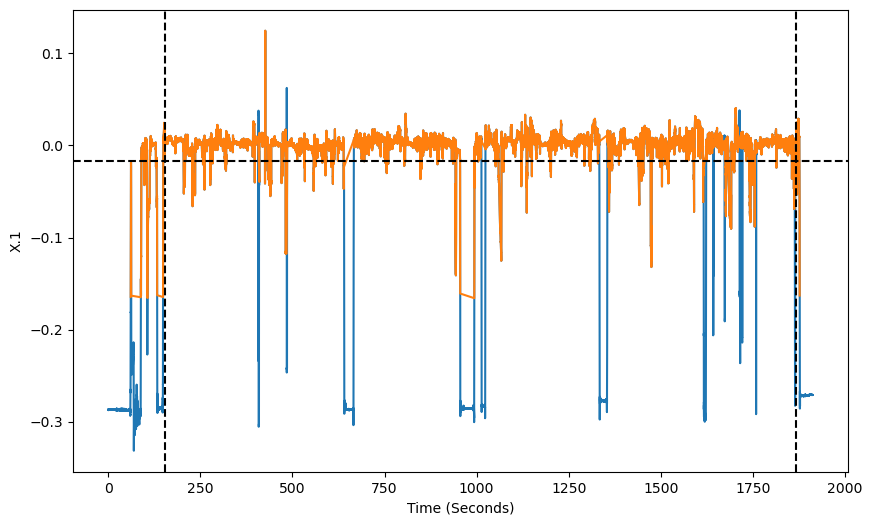

In [163]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=needle_holder_rec['Time (Seconds)'], y=needle_holder_rec['X.1'])
sns.lineplot(x=selected_vx_nh['Time (Seconds)'], y=selected_vx_nh['X.1'])
plt.axvline(x=start_t_task, color='black', linestyle='--')
plt.axvline(x=end_t_task, color='black', linestyle='--')

plt.axhline(y=np.percentile(needle_holder_rec['X.1'], 80), color='black', linestyle='--')

plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x=tweezers_rec['Time (Seconds)'], y=tweezers_rec['X.1'])
sns.lineplot(x=selected_vx_tw['Time (Seconds)'], y=selected_vx_tw['X.1'])
plt.axvline(x=start_t_task, color='black', linestyle='--')
plt.axvline(x=end_t_task, color='black', linestyle='--')

plt.axhline(y=np.percentile(tweezers_rec['X.1'], 20), color='black', linestyle='--')

plt.show()

Look at 3D plots

In [105]:
def pd_2_numpy_and_segment_selection(pd_frame, dict):
    t = pd_frame['Time (Seconds)'].to_numpy()
    # Calculate time differences (dt) between consecutive samples
    # dt = np.diff(t)
    # # Calculate the mean value of dt, which is the average sampling period
    # mean_sampling_period = np.mean(dt)
    # print(f"mean: {1.0 / mean_sampling_period}")
    x = pd_frame['X.1'].to_numpy()
    y = pd_frame['Y.1'].to_numpy()
    z = pd_frame['Z.1'].to_numpy()
    selection = pd_frame['S_final'].to_numpy().astype(int)
    """q_w = pd_frame['W'].to_numpy()
    q_x = pd_frame['X'].to_numpy()
    q_y = pd_frame['Y'].to_numpy()
    q_z = pd_frame['Z'].to_numpy()"""
    list_segmented_stitches = [None] * 8
    i = 0
    for key, value in dict.items():
        t_start, t_end = value 
        mask = (t >= t_start) & (t <= t_end)
        tmp = np.zeros((t[mask].shape[0], 5))
        tmp[:,0] = t[mask]
        tmp[:,1] = x[mask]
        tmp[:,2] = y[mask]
        tmp[:,3] = z[mask] 
        tmp[:,4] = selection[mask]
        list_segmented_stitches[i] = tmp
        i = i + 1
    return list_segmented_stitches

In [106]:
#Take all the constraints to discriminate plots
selected_data_nh['S_final']=(selected_data_nh['Interval_v_pics']) & (selected_data_tw['Selected'])
selected_data_tw['S_final']=(selected_data_tw['Interval_v_pics']) & (selected_data_tw['Selected'])

In [110]:
dict_segment_time = segments_time[1]
list_np_segmented_nh_rec_selected = pd_2_numpy_and_segment_selection(selected_data_nh, dict_segment_time)
list_np_segmented_tw_rec_selected = pd_2_numpy_and_segment_selection(selected_data_tw, dict_segment_time)

In [111]:
def plot_clustered_data_3D_g3(subject_id, tool_name, segment_id, cluster, data, ax, cluster_color):
    
    indices = (cluster==1)
    ax.scatter(data[indices, 1], data[indices, 2], data[indices, 3], color=cluster_color[0], label=f'Cluster 1', s=1)
    
    indices2 = (cluster==0)
    ax.scatter(data[indices2, 1], data[indices2, 2], data[indices2, 3], color=cluster_color[1], label=f'Cluster 2', s=1)

    ax.set_xlabel('[m]')
    ax.set_ylabel('[m]')
    ax.set_zlabel('[m]')
    ax.set_title(f'Stitch {segment_id+1}')

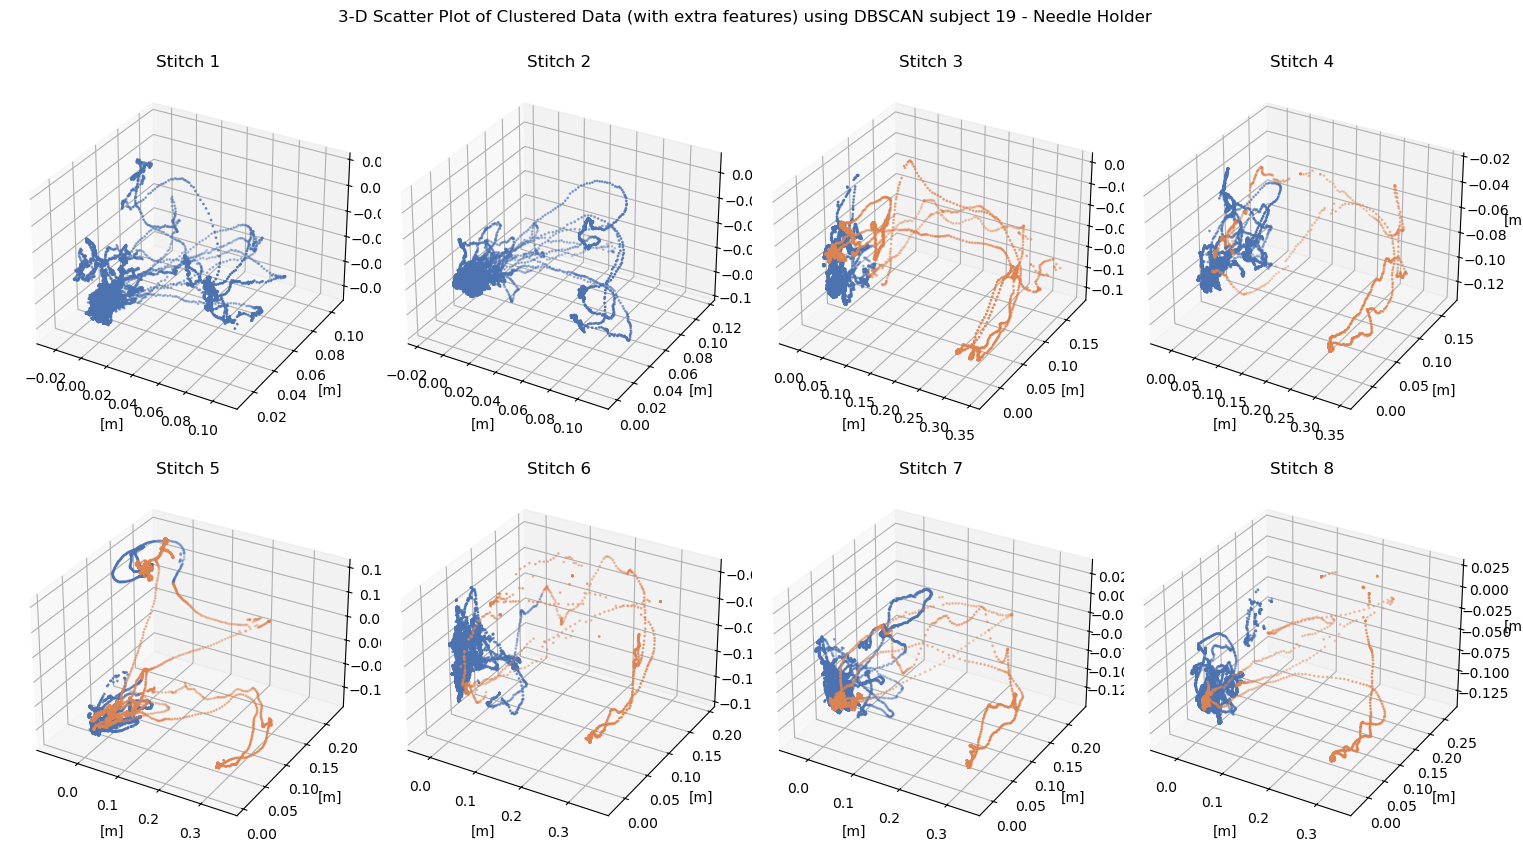

In [109]:
fig = plt.figure(figsize=(15, 9))
for s in range(8):
    ax = fig.add_subplot(2, 4, s+1, projection='3d')
    palette = sns.color_palette("deep", 2)
    plot_clustered_data_3D_g3(0, 0, s, list_np_segmented_nh_rec_selected[s][:,4], list_np_segmented_nh_rec_selected[s], ax, palette)
fig.suptitle(f'3-D Scatter Plot of Clustered Data (with extra features) using DBSCAN subject {subject} - Needle Holder')
plt.tight_layout()
plt.show()

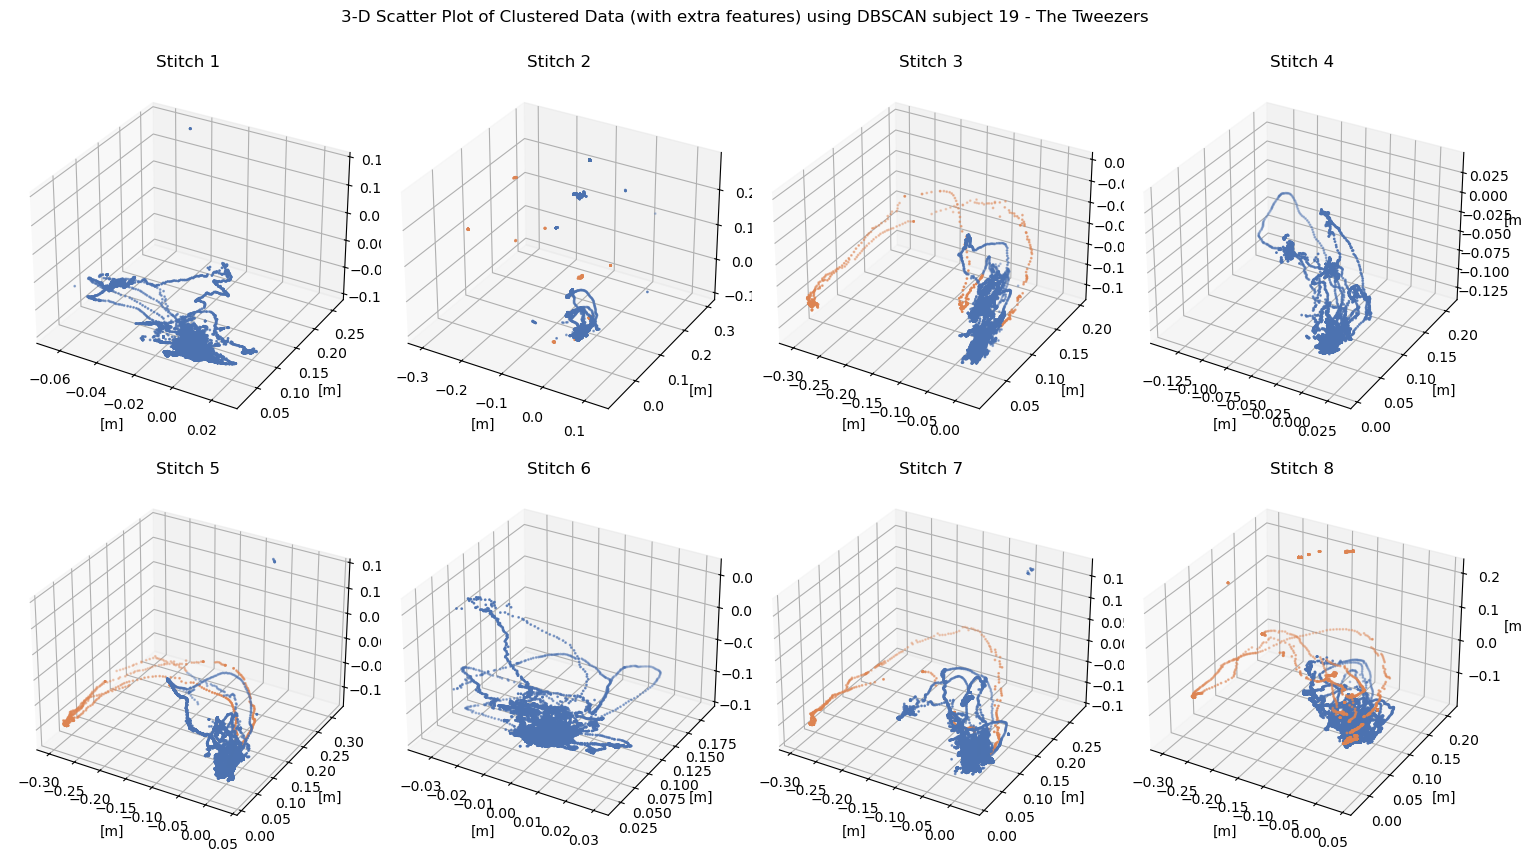

In [112]:
fig = plt.figure(figsize=(15, 9))
for s in range(8):
    ax = fig.add_subplot(2, 4, s+1, projection='3d')
    palette = sns.color_palette("deep", 2)
    plot_clustered_data_3D_g3(0, 0, s, list_np_segmented_tw_rec_selected[s][:,4], list_np_segmented_tw_rec_selected[s], ax, palette)
fig.suptitle(f'3-D Scatter Plot of Clustered Data (with extra features) using DBSCAN subject {subject} - The Tweezers')
plt.tight_layout()
plt.show()